In [ ]:
! wget https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv

--2023-10-12 05:53:32--  https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132904 (130K) [text/plain]
Saving to: ‘indo_spam.csv’

indo_spam.csv       100%[===================>] 129.79K  --.-KB/s    in 0.009s  

2023-10-12 05:53:32 (14.8 MB/s) - ‘indo_spam.csv’ saved [132904/132904]



In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install datasets

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric

In [ ]:
# load data
df = pd.read_csv('indo_spam.csv')
df.head()

,Kategori,Pesan
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...


In [ ]:
df['label'] = df['Kategori'].apply(lambda x:0 if x=="ham" else 1)

In [ ]:
df = df.drop(columns=['Kategori'])
df.rename(columns={"Pesan": "Teks"}, inplace=True)
df

,Teks,label
0,Plg Yth: Simcard anda mendptkan bonus poin plu...,1
1,Iya ih ko sedih sih gtau kapan lg ke bandung :(,0
2,Kalau mau bikin model/controller mending per a...,0
3,Selamat nama1. Semoga selalu menempuh hidup ya...,0
4,Tingkatkan nilai isi ulang Anda selanjutnya mi...,1
...,...,...
1138,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,0
1139,"Semangat yang ibu gita, ibu putri dan bapak ad...",0
1140,"nama1, minta database kamu sama view dan contr...",0
1141,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,1


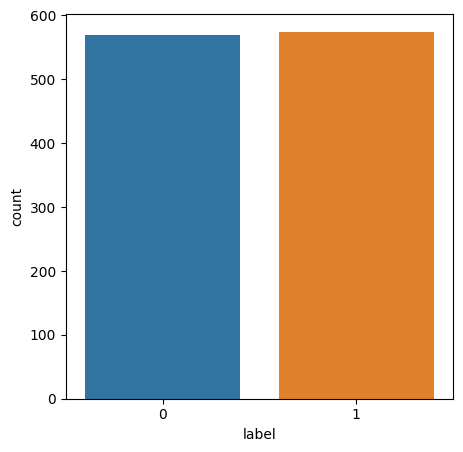

In [ ]:
# check count and unique and top values and their frequency
plt.figure(figsize=(5, 5))
sns.countplot(x=df['label'])
plt.show()

In [ ]:
df['label'].value_counts()

1    574
0    569
Name: label, dtype: int64

In [ ]:
df.sample(10)

,Teks,label
716,Paket BRONET 2GB 60hr 24jam sudah aktif. Nikma...,1
918,Slmt!! No Anda Men-dptkan Hadiah dr Pengundian...,1
624,"Assalamualaikum akang teteh, jangan lupa ya ha...",0
981,Bpk/Ibu Mengenai Rekening Anda Terpilih Sebaga...,1
1107,Slmt!!No anda Mendpt hadiah Rp.75jt.dari TELKO...,1
835,soal ada multiple choice ada essay. Yg weka ma...,0
680,Dptkn kesempatan raih hadiah utama mobil Alpha...,1
40,Kalo pake daging yg dah direbus enak gak dijad...,0
1081,Kemudahan dan Keamanan bisnis TOGEL kini Berbe...,1
22,Aku mau nyari data yang dibutuhin dari tabel m...,0


Cleaning

In [ ]:
df['Teks']=df['Teks'].str.lower()
df

,Teks,label
0,plg yth: simcard anda mendptkan bonus poin plu...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung :(,0
2,kalau mau bikin model/controller mending per a...,0
3,selamat nama1. semoga selalu menempuh hidup ya...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet/datar atau yg pgn ikutan deba...,0
1139,"semangat yang ibu gita, ibu putri dan bapak ad...",0
1140,"nama1, minta database kamu sama view dan contr...",0
1141,dapatkan gratis 1 cappuccino (hot/ice) & freza...,1


In [ ]:
import re

In [ ]:
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [ ]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,plg yth simcard anda mendptkan bonus poin plus...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,kalau mau bikin model controller mending per a...,0
3,selamat nama semoga selalu menempuh hidup yang...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,nama minta database kamu sama view dan control...,0
1141,dapatkan gratis cappuccino hot ice freza setia...,1


In [ ]:
def cleaning_text(text):
  return text.translate(str.maketrans("","",string.punctuation))
  return text.strip()
  return re.sub('\s+',' ',text)
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [ ]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,plg yth simcard anda mendptkan bonus poin plus...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,kalau mau bikin model controller mending per a...,0
3,selamat nama semoga selalu menempuh hidup yang...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,nama minta database kamu sama view dan control...,0
1141,dapatkan gratis cappuccino hot ice freza setia...,1


In [ ]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [ ]:
df['Teks']=df['Teks'].apply(remove_tweet_special)
df

,Teks,label
0,plg yth simcard anda mendptkan bonus poin plus...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,kalau mau bikin model controller mending per a...,0
3,selamat nama semoga selalu menempuh hidup yang...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,nama minta database kamu sama view dan control...,0
1141,dapatkan gratis cappuccino hot ice freza setia...,1


In [ ]:
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.4,
    random_state=RANDOM_SEED,
)

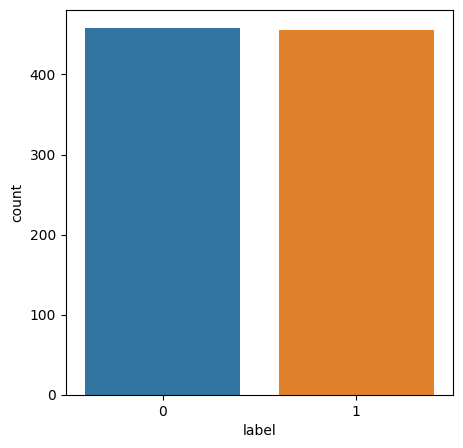

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

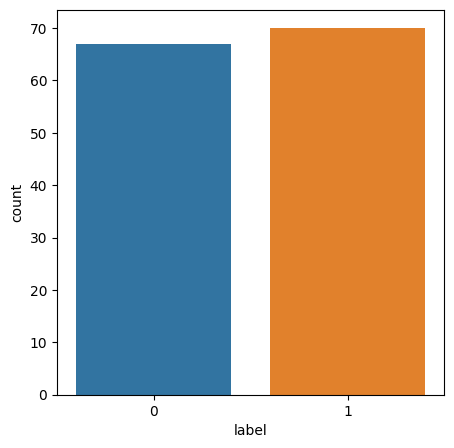

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

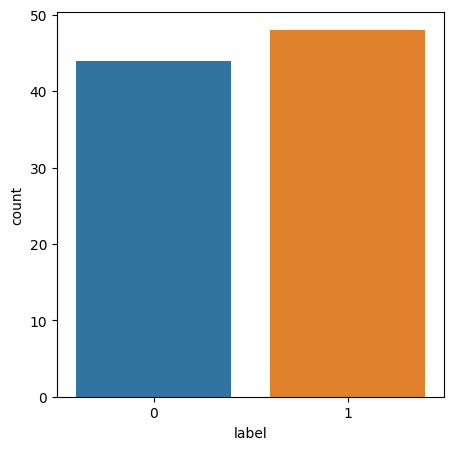

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [ ]:
print(f'Total Train: {len(df_train)}')
print(f'Total Val  : {len(df_val)}')
print(f'Total Test : {len(df_test)}')

Total Train: 914
Total Val  : 137
Total Test : 92


In [ ]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [ ]:
from datasets import load_dataset

files = {
    "train": "train.csv",
    "eval": "eval.csv",
    "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

In [ ]:
def tokenize_function(text):
    return tokenizer(text["Teks"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/914 [00:00<?, ? examples/s]

Map:   0%|          | 0/137 [00:00<?, ? examples/s]

Map:   0%|          | 0/92 [00:00<?, ? examples/s]

In [ ]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

In [ ]:
import torch
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments
from torch import clamp

training_args = TrainingArguments(
    "test_trainer",
    per_device_train_batch_size=4,
)

In [ ]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

torch.cuda.empty_cache()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

training_history = trainer.train()

<ipython-input-41-fd3739473b36>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


Step,Training Loss
500,0.171800


In [ ]:
evaluation_history = trainer.evaluate()
evaluation_history

{'eval_loss': 0.00854005478322506,
 'eval_accuracy': 0.9927007299270073,
 'eval_runtime': 2.2512,
 'eval_samples_per_second': 60.857,
 'eval_steps_per_second': 7.996,
 'epoch': 3.0}

In [ ]:
test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

In [ ]:
actual_label = df_test['label']

In [ ]:
print(classification_report(prediction, actual_label, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.98      0.98      0.98        48

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



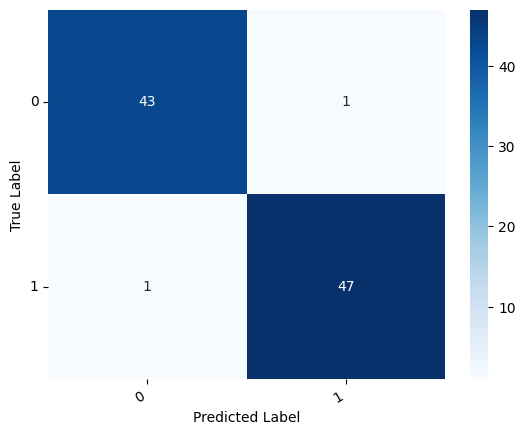

In [ ]:
def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

In [ ]:
model.save_pretrained("model")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("model")

In [ ]:
trainer = Trainer(model=model)

In [ ]:
def predict(text):
    tokenized = tokenizer(text, padding='max_length', max_length=256)
    label = trainer.predict([tokenized]).predictions.argmax(1)[0]
    if label == 0:
        print(f'Predicted: Ham [{label}]')
    else:
        print(f'Predicted: Spam [{label}]')

In [ ]:
predict("""
    Selamat!! anda Mendpt hadiah Rp. 75 juta. Dari TELKOMSEL point "Edisi september" Hub kntr pusat
""")

Predicted: Spam [1]


In [ ]:
predict("""
    Assalamualaikum Pak. Ini dg nama1 ilkom 2012. Maaf Pak td saya ninggalin proposal di meja Bapak di atas printer. Terima kasih Pak.
""")

Predicted: Ham [0]
